# Python NLTK Natural Language Tool Kit
## Topics covered in this video
- Exploring the NLTK corpus  
- Dictionary definitions   
- Punctuation and stop words  
- Stemming and lemmatization  
- Sentence and word tokenizers 
- Parts of speech tagging  
- word2vec  
- Clustering and classifying

### NLTK Setup
First you need to install the nltk library with 'pip install nltk' or some equivalent shell command.  
Then you need to download the nltk corpus by running  
```python  
import nltk  
nltk.download()```
This will open the NLTK downloader dialog window where you should just click Download All. The corpus is a large and varied body of sample documents that you'll need for this video, including dictionaries and word lists like stop words. You can uninstall it later if you have a shortage of disk space with *pip uninstall nltk*.


In [66]:
import nltk
from nltk.book import *

print(type(text1))
print(len(text1))
print(len(set(text1)))
print(text1[:10])
print(text2[:10])

<class 'nltk.text.Text'>
260819
19317
['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.']
['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER']


In [67]:
from nltk.corpus import gutenberg
print(gutenberg.fileids())
hamlet = gutenberg.words('shakespeare-hamlet.txt')
print(len(hamlet))
hamlet_sentences = gutenberg.sents('shakespeare-hamlet.txt')
print(len(hamlet_sentences))
print(hamlet_sentences[1024])
print(len(gutenberg.paras('shakespeare-hamlet.txt')))

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
37360
3106
['What', 'say', 'you', '?']
950


### Get the count of a word in a document, or the context of every occurence of a word in a document.

In [68]:
print(text1.count('horse'))
print(text1.concordance('passion'))
print(text2.concordance('passion'))

26
Displaying 7 of 7 matches:
r him ," said I , now flying into a passion again at this unaccountable farrago
 employed in the celebration of the Passion of our Lord ; though in the Vision 
ce all mortal interests to that one passion ; nevertheless it may have been tha
ing with the wildness of his ruling passion , yet were by no means incapable of
it , however promissory of life and passion in the end , it is above all things
o ' s lordly chest . So have I seen Passion and Vanity stamping the living magn
 Guernseyman , flying into a sudden passion . " Oh ! keep cool -- cool ? yes , 
None
Displaying 5 of 5 matches:
one ," said Elinor , " who has your passion for dead leaves ." " No ; my feelin
r daughters , without extending the passion to her ; and Elinor had the satisfa
r , if he was to be in the greatest passion !-- and Mr . Donavan thinks just th
edness I could have borne , but her passion -- her malice -- At all events it m
ling a sacrifice to an irresistible passion , as once she 

**FreqDist and most_common**  
We can use FreqDist to find the number of occurrences of each word in the text.  
By getting len(vocab) we get the number of unique words in the text (including punctuation).  
And we can get the most common words easily too.

In [69]:
vocab = nltk.FreqDist(text1)
print(len(vocab))
print(vocab.most_common(20))

19317
[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632)]


Here we got the 80 most common words, filtered only the ones with at least 3 characters, then sorted them descending by number of occurences.  
A better way is to first remove all the *stop words* (see below), then get the FreqDist.

In [70]:
mc = sorted([w for w in vocab.most_common(80) if len(w[0]) > 3], key=lambda x: x[1], reverse=True)
print(mc)

[('that', 2982), ('with', 1659), ('this', 1280), ('from', 1052), ('whale', 906), ('have', 760), ('there', 715), ('were', 680), ('which', 640), ('like', 624), ('their', 612), ('they', 586), ('some', 578), ('then', 571), ('when', 553), ('upon', 538), ('into', 520), ('ship', 507), ('more', 501), ('Ahab', 501), ('them', 471), ('what', 442), ('would', 421), ('been', 415), ('other', 412), ('over', 403)]


### A dispersion plot shows you where in the document a word is used. You can pass in a list of words.

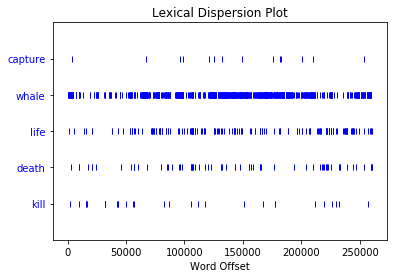

In [71]:
text1.dispersion_plot(['capture', 'whale', 'life', 'death', 'kill'])

### Dictionary definitions
Use wordnet synsets to get word definitions and examples of usage.  
The [0] is required because synsets returns a list, with an entry for each POS.

In [72]:
from nltk.corpus import wordnet as wn
w = wn.synsets("unmitigated")[0]
print(w.name(), '-', w.definition())
print(w.examples())

unmitigated.a.01 - not diminished or moderated in intensity or severity; sometimes used as an intensifier
['unmitigated suffering', 'an unmitigated horror', 'an unmitigated lie']


### Punctuation and Stop Words
Text analysis is often faster and easier if you can remove useless words.  
NLTK provides a list of these stop words so it's easy to filter them out of your text prior to processing.  
Here, 15% of our text is punctuation, and 40% is stop words. So we shrink the text by more than half by stripping out punctuation and stop words.

In [73]:
from string import punctuation
print(punctuation)
without_punct = [w for w in text1 if w not in punctuation]  # this is called a list comprehension

from nltk.corpus import stopwords
sw = stopwords.words('english')
print(sw)
without_sw = [w for w in without_punct if w not in sw] 

print(len(text1))
print(len(without_punct))
print(len(without_sw))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only

### Stemming and Lemmatization
These term normalization algorithms strip the word endings off to reduce the number of root words for easier matching.  
This is useful for search term matching. [NLTK stemming docs](https://www.nltk.org/api/nltk.stem.html)

In [74]:
from nltk.stem.porter import PorterStemmer
st = PorterStemmer()
words = ['is', 'are', 'bought', 'buys', 'giving', 'jumps', 'jumped', 'birds', 'do', 'does', 'did', 'doing']
for word in words:
    print(word, st.stem(word))

is is
are are
bought bought
buys buy
giving give
jumps jump
jumped jump
birds bird
do do
does doe
did did
doing do


**WordNet Lemmatizer**   
The difference is that the result of stemming may not be an actual word, but lemmatization returns the root word. NLTK supports both.  
You can also try the Lancaster or Snowball stemmers. The Snowball stemmer supports numerous languages: Arabic, Danish, Dutch, English, Finnish, French, German, Hungarian, Italian, Norwegian, Portuguese, Romanian, Russian, Spanish and Swedish.

In [75]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
words = ['is', 'are', 'bought', 'buys', 'giving', 'jumps', 'jumped', 'birds', 'do', 'does', 'did', 'doing']
for word in words:
    print(word, wnl.lemmatize(word))

is is
are are
bought bought
buys buy
giving giving
jumps jump
jumped jumped
birds bird
do do
does doe
did did
doing doing


### Sentence and Word Tokenizers
Sentence tokenizer breaks text down into a list of sentences. It's pretty good at handling punctuation and decimal numbers.  
[Word tokenizer](https://www.nltk.org/api/nltk.tokenize.html) breaks a string down into a list of words and punctuation.  
It is also easy to get parts of speech using nltk.pos_tag. There are different tagsets, depending on how much detail you want. I like universal.

In [76]:
from nltk.tokenize import sent_tokenize, word_tokenize
s = 'Hello. I am Joe! I like Python. 263.5 is a big number.'  # 4 sentences
print(sent_tokenize(s))

w = word_tokenize('The quick brown fox jumps over the lazy dog.')
print(w)

['Hello.', 'I am Joe!', 'I like Python.', '263.5 is a big number.']
['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']


### Parts of Speech Tagging
To break a block of text down into its parts of speech use pos_tag.  
The default tagset uses 2 or 3 letter tokens that are hard for me to understand. [StackOverflow](https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk) has a great decoder for the default POS tags.  
The Universal tagset gives a more familiar looking tag (noun, verb, adj).  
NLTK includes several other tagsets you can try.

In [77]:
w = word_tokenize('The quick brown fox jumps over the lazy dog.')
print(w)
print(nltk.pos_tag(w))
print(nltk.pos_tag(w, tagset='universal'))

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']
[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]
[('The', 'DET'), ('quick', 'ADJ'), ('brown', 'NOUN'), ('fox', 'NOUN'), ('jumps', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN'), ('.', '.')]


### Word2Vec
[Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html) uses neural networks to analyze words in a corpus by using the contexts of words. 
It takes as its input a large corpus of text, and maps unique words to a vector space, such that 
words that share common contexts in the corpus are located in close proximity to one another in the space.  
Word2Vec does NOT look at word meanings, it only finds words that are used in combination with other words. So *frying* and *pan* may have a high similarity.  
You can see here the context of one word (pain) for two different corpora.  
This uses the popular gensim library, which is not part of NLTK.

In [78]:
from gensim.models import Word2Vec
emma_vec = Word2Vec(gutenberg.sents('austen-emma.txt'))
leaves_vec = Word2Vec(gutenberg.sents('whitman-leaves.txt'))
print(emma_vec.wv.most_similar('pain', topn=6))
print(leaves_vec.wv.most_similar('pain', topn=6))

[('person', 0.9992861747741699), ('favourable', 0.998925507068634), ('meaning', 0.9987690448760986), ('effect', 0.9987439513206482), ('comfortable', 0.998741626739502), ('delay', 0.9987210035324097)]
[('even', 0.9980006217956543), ('moment', 0.9979783296585083), ('hence', 0.9979231357574463), ('without', 0.9979217052459717), ('separate', 0.9979064464569092), ('Now', 0.9979038238525391)]


In [79]:
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from string import punctuation
import pprint as pp

bible_sents = gutenberg.sents('bible-kjv.txt')
sw = stopwords.words('english')
bible = [[w.lower() for w in s if w not in punctuation and w not in sw] for s in bible_sents]
print(len(bible))

bible_vec = Word2Vec(bible)
pp.pprint(bible_vec.wv.most_similar('god', topn=8))
pp.pprint(bible_vec.wv.most_similar('creation', topn=5))

30103
[('mercy', 0.9284727573394775),
 ('liveth', 0.9062315821647644),
 ('truth', 0.8941866159439087),
 ('grace', 0.8938426375389099),
 ('glory', 0.8936725854873657),
 ('salvation', 0.8859732747077942),
 ('hosts', 0.8839103579521179),
 ('confession', 0.8837960958480835)]
[('making', 0.9873884916305542),
 ('abundant', 0.9802387952804565),
 ('realm', 0.98007732629776),
 ('powers', 0.9798883199691772),
 ('twice', 0.9775580763816833)]


### k-Means Clustering
[Clustering](http://www.nltk.org/api/nltk.cluster.html) groups similar items together.  
The K-means clusterer starts with k arbitrarily chosen means (or centroids) then assigns each vector to the cluster with the closest mean. It then recalculates the means of each cluster as the centroid of its vector members. This process repeats until the cluster memberships stabilize. [NLTK docs on this example](https://www.nltk.org/_modules/nltk/cluster/kmeans.html)  
This example clusters int vectors, which you can think of as points on a plane. But you could also use clustering to cluster similar documents by vocabulary/topic.

In [80]:
import numpy as np
from nltk.cluster import KMeansClusterer, euclidean_distance

vectors = [np.array(f) for f in [[2, 1], [1, 3], [4, 7], [6, 7]]]
means = [[4, 3], [5, 5]]

clusterer = KMeansClusterer(2, euclidean_distance, initial_means=means)
clusters = clusterer.cluster(vectors, True, trace=True)

print('Clustered:', vectors)
print('As:', clusters)
print('Means:', clusterer.means())

k-means trial 0
iteration
iteration
Clustered: [array([2, 1]), array([1, 3]), array([4, 7]), array([6, 7])]
As: [0, 0, 1, 1]
Means: [array([1.5, 2. ]), array([5., 7.])]


**k-Means Clustering, Example-2**  
In this example we cluster an array of 6 points into 2 clusters.  
The initial centroids are randomly chosen by the clusterer, and it does 10 iterations to regroup the clusters and recalculate centroids. 

In [103]:
vectors = [np.array(f) for f in [[3, 3], [1, 2], [4, 2], [4, 0], [2, 3], [3, 1]]]

# test k-means using 2 means, euclidean distance, and 10 trial clustering repetitions with random seeds
clusterer = KMeansClusterer(2, euclidean_distance, repeats=10)
clusters = clusterer.cluster(vectors, True)
centroids = clusterer.means()
print('Clustered:', vectors)
print('As:', clusters)
print('Means:', centroids)

# classify a new vector
vector = np.array([2,2])
print('classify(%s):' % vector, end=' ')
print(clusterer.classify(vector))

Clustered: [array([3, 3]), array([1, 2]), array([4, 2]), array([4, 0]), array([2, 3]), array([3, 1])]
As: [0, 0, 1, 1, 0, 1]
Means: [array([2.        , 2.66666667]), array([3.66666667, 1.        ])]
classify([2 2]): 0


**Plot a Chart of the Clusters in Example-2**  
Make a Scatter Plot of the two clusters using matplotlib.pyplot.   
We plot all the points in cluster-0 blue, and all the points in cluster-1 red. Then we plot the two centroids in orange.  
I used list comprehensions to create new lists for all the x0, y0, x1 and y1 values.

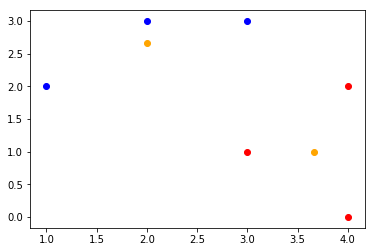

In [104]:
import matplotlib.pyplot as plt

x0 = np.array([x[0] for idx, x in enumerate(vectors) if clusters[idx]==0])
y0 = np.array([x[1] for idx, x in enumerate(vectors) if clusters[idx]==0])
plt.scatter(x0,y0, color='blue')
x1 = np.array([x[0] for idx, x in enumerate(vectors) if clusters[idx]==1])
y1 = np.array([x[1] for idx, x in enumerate(vectors) if clusters[idx]==1])
plt.scatter(x1,y1, color='red')

xc = np.array([x[0] for x in centroids])
yc = np.array([x[1] for x in centroids])
plt.scatter(xc,yc, color='orange')
plt.show()